In [ ]:
import numpy as np
import pandas as pd

import time
import statistics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import  MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
match_path = "/content/drive/MyDrive/last_semester/EPL_dataB_new/match_all_season.csv"
player_path = "/content/drive/MyDrive/last_semester/EPL_dataB_new/player_all_season.csv"

match_df = pd.read_csv(match_path)
player_df = pd.read_csv(player_path)

player_df = player_df.replace(-1, 0)

In [ ]:
match_df

,Unnamed: 0,id,season,label,ground,clock,name_1,id_1,score_1,formation_1,...,att_freekick_post_2,att_obx_left_2,att_lg_left_2,att_pen_miss_2,att_obp_goal_2,att_pen_post_2,fifty_fifty_2,successful_fifty_fifty_2,att_obox_own_goal_2,rescinded_red_card_2
0,0,93321,2023-24,"Fri 11 Aug 2023, 20:00 BST",Turf Moor,5940,Burnley,43,0,5-4-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,1,93380,2023-24,"Sun 24 Sep 2023, 16:30 BST",Bramall Lane,5820,Sheffield United,18,0,3-4-2-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,2,93377,2023-24,"Sun 24 Sep 2023, 14:00 BST",Anfield,5760,Liverpool,10,3,4-3-3,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,3,93375,2023-24,"Sun 24 Sep 2023, 14:00 BST",Stamford Bridge,6120,Chelsea,4,0,4-2-3-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,4,93373,2023-24,"Sun 24 Sep 2023, 14:00 BST",American Express Stadium,5820,Brighton & Hove Albion,131,3,4-2-3-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,1895,46608,2019-20,"Sat 10 Aug 2019, 15:00 BST",Selhurst Park,5700,Crystal Palace,6,0,4-4-2,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1896,1896,46607,2019-20,"Sat 10 Aug 2019, 15:00 BST",Turf Moor,5640,Burnley,43,3,4-4-2,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1897,1897,46606,2019-20,"Sat 10 Aug 2019, 15:00 BST",Vitality Stadium,5700,Bournemouth,127,1,3-4-2-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1898,1898,46605,2019-20,"Fri 9 Aug 2019, 20:00 BST",Anfield,5580,Liverpool,10,4,4-3-3,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [ ]:
player_df

,Unnamed: 0,id,playerId,name,season,position,shirtNum,positionInfo,country,birth,...,att_freekick_post,att_freekick_goal,att_obx_left,att_lg_right,penalty_save,att_pen_miss,fifty_fifty,successful_fifty_fifty,back_pass,rescinded_red_card
0,0,4880.0,314795.0,Kenny Tete,2023-24,D,0.0,Right Full Back,Netherlands,1995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,145135.0,362370.0,Sam Curtis,2023-24,D,2.0,Full Back,Ireland,2005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,144906.0,358269.0,Dominic Martins,2023-24,M,48.0,Defensive Midfielder,Portugal,2005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,144899.0,365183.0,Callan McKenna,2023-24,G,0.0,Goalkeeper,Scotland,2006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,144788.0,356314.0,Hákon Valdimarsson,2023-24,G,12.0,Goalkeeper,Iceland,2001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4815,4815,14674.0,281203.0,Dennis Adeniran,2019-20,M,8.0,Centre Central Midfielder,England,1999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4816,4816,13549.0,258884.0,Tosin Adarabioyo,2019-20,D,4.0,Centre Central Defender,England,1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4817,4817,10905.0,161456.0,Ché Adams,2019-20,F,10.0,Centre Striker,England,1996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4818,4818,13286.0,289629.0,Tammy Abraham,2019-20,F,9.0,Centre Striker,England,1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for i in player_df.columns:
    print(i)

Unnamed: 0
id
playerId
name
season
position
shirtNum
positionInfo
country
birth
age
game_started
winning_goal
times_tackled
appearances
total_pass
total_back_zone_pass
rightside_pass
open_play_pass
successful_open_play_pass
accurate_pass
touches
accurate_back_zone_pass
backward_pass
attempts_conceded_ibox
final_third_entries
successful_final_third_passes
passes_right
duel_lost
leftside_pass
poss_lost_ctrl
total_final_third_passes
total_fwd_zone_pass
challenge_lost
poss_lost_all
accurate_fwd_zone_pass
fwd_pass
offside_provoked
accurate_throws
total_long_balls
accurate_long_balls
total_throws
put_through
attempts_conceded_obox
total_chipped_pass
dispossessed
accurate_chipped_pass
total_cross_nocorner
total_cross
crosses_18yard
pen_area_entries
effective_head_clearance
head_clearance
effective_clearance
total_clearance
total_tackle
won_tackle
duel_won
long_pass_own_to_opp_success
long_pass_own_to_opp
head_pass
fouled_final_third
was_fouled
attempted_tackle_foul
fouls
outfielder_block
ball

In [ ]:
goalkeeper_att = ['saves',
                  'penalty_save',
                  'goals_conceded',
                  'clean_sheet',
                  'punches',
                  'total_throws',
                  'total_high_claim',
                  'good_high_claim',
                  'error_lead_to_goal',
                  'goal_kicks',
                  'accurate_long_balls']
defender_att = ['blocked_cross',
                'blocked_pass',
                'blocked_scoring_att',
                'interception',
                'won_tackle',
                'duel_won',
                'duel_lost',
                'big_chance_created',
                'error_lead_to_goal',
                'aerial_won',
                'aerial_lost',
                'total_clearance',
                'ball_recovery',
                'fifty_fifty',
                'total_att_assist',
                'accurate_cross',
                'accurate_long_balls',
                'total_cross',
                'total_tackle',
                'effective_head_clearance']
midfielder_att = ['accurate_pass',
                  'goals',
                  'total_pass',
                  'big_chance_created',
                  'big_chance_missed',
                  'big_chance_scored',
                  'shot_off_target',
                  'penalty_won',
                  'accurate_freekick_cross',
                  'total_clearance',
                  'goals',
                  'interception',
                  'duel_won',
                  'duel_lost',
                  'accurate_goal_kicks',
                  'total_tackle',
                  'won_tackle',
                  'aerial_won',
                  'aerial_lost',
                  'fifty_fifty',
                  'successful_final_third_passes',
                  'total_final_third_passes',
                  'total_att_assist',
                  'effective_head_clearance',
                  'accurate_long_balls', ]
forward_att = ['accurate_pass',
               'goals',
               'big_chance_scored',
               'big_chance_created',
               'big_chance_missed',
               'total_tackle',
               'interception',
               'penalty_won',
               'total_clearance',
               'shot_off_target',
               'shot_fastbreak',
               'total_att_assist',
               'accurate_freekick_cross',
               'goal_assist',
               'total_scoring_att',
               'duel_won',
               'duel_lost',
              #  'total_distance_in_m',
               'effective_head_clearance']

In [ ]:
##only get matches from 2015-2016 to present because of enough information
col = ["id", "score_1", "score_2", "season", "formation_1"] + ["lineup_player_id_"+str(i)+"_1" for i in range(11)] + ["formation_2"] + ["lineup_player_id_"+str(i)+"_2" for i in range(11)]

# match_df1 = match_df.loc[match_df["season"] >= "2015-16"]
match_df1 = match_df[col]

In [ ]:
print(match_df1.columns)

Index(['id', 'score_1', 'score_2', 'season', 'formation_1',
       'lineup_player_id_0_1', 'lineup_player_id_1_1', 'lineup_player_id_2_1',
       'lineup_player_id_3_1', 'lineup_player_id_4_1', 'lineup_player_id_5_1',
       'lineup_player_id_6_1', 'lineup_player_id_7_1', 'lineup_player_id_8_1',
       'lineup_player_id_9_1', 'lineup_player_id_10_1', 'formation_2',
       'lineup_player_id_0_2', 'lineup_player_id_1_2', 'lineup_player_id_2_2',
       'lineup_player_id_3_2', 'lineup_player_id_4_2', 'lineup_player_id_5_2',
       'lineup_player_id_6_2', 'lineup_player_id_7_2', 'lineup_player_id_8_2',
       'lineup_player_id_9_2', 'lineup_player_id_10_2'],
      dtype='object')


In [ ]:
# prompt: player_df, if float columns always end in 0, convert to int

# Iterate through float columns and convert to int if all values end in .0
for col in player_df.select_dtypes(include=['float64']).columns:
    if all(player_df[col] % 1 == 0):
        player_df[col] = player_df[col].astype(int)

player_df

,Unnamed: 0,id,playerId,name,season,position,shirtNum,positionInfo,country,birth,...,att_freekick_post,att_freekick_goal,att_obx_left,att_lg_right,penalty_save,att_pen_miss,fifty_fifty,successful_fifty_fifty,back_pass,rescinded_red_card
0,0,4880,314795,Kenny Tete,2023-24,D,0,Right Full Back,Netherlands,1995,...,0,0,0,0,0,0,0,0,0,0
1,1,145135,362370,Sam Curtis,2023-24,D,2,Full Back,Ireland,2005,...,0,0,0,0,0,0,0,0,0,0
2,2,144906,358269,Dominic Martins,2023-24,M,48,Defensive Midfielder,Portugal,2005,...,0,0,0,0,0,0,0,0,0,0
3,3,144899,365183,Callan McKenna,2023-24,G,0,Goalkeeper,Scotland,2006,...,0,0,0,0,0,0,0,0,0,0
4,4,144788,356314,Hákon Valdimarsson,2023-24,G,12,Goalkeeper,Iceland,2001,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4815,4815,14674,281203,Dennis Adeniran,2019-20,M,8,Centre Central Midfielder,England,1999,...,0,0,0,0,0,0,0,0,0,0
4816,4816,13549,258884,Tosin Adarabioyo,2019-20,D,4,Centre Central Defender,England,1997,...,0,0,0,0,0,0,0,0,0,0
4817,4817,10905,161456,Ché Adams,2019-20,F,10,Centre Striker,England,1996,...,0,0,0,0,0,0,0,0,0,0
4818,4818,13286,289629,Tammy Abraham,2019-20,F,9,Centre Striker,England,1997,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# # prompt: create new player id 999999, playerID 9999999, all string attr is "a", int "0", float "0.0"

# # Create a new player with ID 999999
# new_player_data = {'player_id': 999999}

# # Add string attributes (all set to 'a')
# string_columns = player_df.select_dtypes(include=['object']).columns
# for col in string_columns:
#     new_player_data[col] = 'a'

# # Add integer attributes (all set to 0)
# int_columns = player_df.select_dtypes(include=['int64', 'int32']).columns
# for col in int_columns:
#     new_player_data[col] = 0

# # Add float attributes (all set to 0.0)
# float_columns = player_df.select_dtypes(include=['float64']).columns
# for col in float_columns:
#     new_player_data[col] = 0.0

# new_player_data["id"] = 999999

# # Create a DataFrame for the new player
# new_player_df = pd.DataFrame([new_player_data])

# # Concatenate the new player data to the existing DataFrame
# player_df = pd.concat([player_df, new_player_df], ignore_index=True)

# player_df

In [ ]:
#get data for training
# formation, G, D, M , F
# key_team
formation_index = {"3-4-2-1": 1,
                  "3-4-3": 2,
                  "3-5-2":3,
                  "4-1-4-1": 4,
                  "4-2-3-1": 5,
                  "4-3-3": 6,
                  "4-4-1-1": 7,
                  "4-4-2": 8}
home = ["lineup_player_id_"+str(i)+"_1" for i in range(11)]
away = ["lineup_player_id_"+str(i)+"_2" for i in range(11)]
# get position_player_id in a team

def get_position(team_id):
    check = True
    team = {"G": [], "M": [], "D": [], "F": []}
    for id_player in team_id:
        player = player_df.loc[player_df["id"] == id_player]
        if player.empty:
            print("HUH", id_player)
            # id_player = 999999
            # player = player_df.loc[player_df["id"] == id_player]
        try:
            team[player["position"].values[0]].append(id_player)
        except:
            pass
    for i in team:
        if team[i] == []:
            check = False
            print("no exit")
            break
    return team, check

def get_data_G(id_G, season):
    player = player_df.loc[(player_df["id"] == id_G[0]) & (player_df["season"] == season)]
    values = []
    for att in goalkeeper_att:
        values.append(player[att].values[0])
    return values

def get_data_D(id_D, season):
    player = player_df.loc[(player_df["id"].isin(id_D)) & (player_df["season"] == season)]
    values = []
    for att in defender_att:
        values.append(statistics.mean(player[att].values))
    return values

def get_data_M(id_M, season):
    player = player_df.loc[(player_df["id"].isin(id_M)) & (player_df["season"] == season)]
    values = []
    for att in midfielder_att:
        values.append(statistics.mean(player[att].values))
    return values

def get_data_F(id_F, season):
    player = player_df.loc[(player_df["id"].isin(id_F)) & (player_df["season"] == season)]
    values = []
    for att in forward_att:
        values.append(statistics.mean(player[att].values))
    return values

# # get player in two team
# def get_player_id_in_match():
#     i = 0
#     label = []
#     data = []
#     for row in match_df1.iterrows():
#         home_team = []
#         away_team = []
#         # if i== 5:
#         #     break
#         # i = i+1
#         data_row = row[1]
#         print(data_row["id"])

#         season = data_row["season"]

#         print(season)
#         for ind in home:
#             home_team.append(data_row[ind])
#         for ind in away:
#             away_team.append(data_row[ind])
#         home_team, homecheck = get_position(home_team)
#         away_team, awaycheck = get_position(away_team)
#         print(home_team, homecheck)
#         print(away_team, awaycheck)

#         if homecheck == True and awaycheck == True:
#             print("yes")
#             try:
#                 newrow = []
#                 ## in home_team
#                 home_values = []
#                 if data_row["formation_1"] in formation_index:
#                     home_values.append(formation_index[data_row["formation_1"]])
#                 else:
#                     home_values.append(0)

#                 # procesing G
#                 G = get_data_G(home_team["G"], season)
#                 # processing D
#                 D = get_data_D(home_team["D"], season)
#                 # processing M
#                 M = get_data_M(home_team["M"], season)
#                 # processing F
#                 F = get_data_F(home_team["F"], season)

#                 home_values = home_values + G + D + M +F


#                 ## in away_team
#                 away_values = []
#                 if data_row["formation_2"] in formation_index:
#                     away_values.append(formation_index[data_row["formation_2"]])
#                 else:
#                     away_values.append(0)

#                 # procesing G
#                 G = get_data_G(away_team["G"], season)
#                 # processing D
#                 D = get_data_D(away_team["D"], season)
#                 # processing M
#                 M = get_data_M(away_team["M"], season)
#                 # processing F
#                 F = get_data_F(away_team["F"], season)

#                 away_values = away_values + G + D + M +F

#                 new_row = home_values + away_values
#                 data.append(new_row)
#                 print("new", new_row, len(new_row))

#                 if data_row["score_1"] > data_row["score_2"]:
#                     label.append(0)
#                 elif data_row["score_1"] == data_row["score_2"]:
#                     label.append(1)
#                 else:
#                     label.append(2)
#             except Exception as e:
#                 pass
#     return data, label
# data, label = get_player_id_in_match()

In [ ]:
import statistics
from tqdm.notebook import tqdm

# Define column names based on the data structure.
columns = ["season", "id"]

# Adding home team columns
columns.append("home_formation")
columns += [f"home_G_{att}" for att in goalkeeper_att]
columns += [f"home_D_{att}" for att in defender_att]
columns += [f"home_M_{att}" for att in midfielder_att]
columns += [f"home_F_{att}" for att in forward_att]

# Adding away team columns
columns.append("away_formation")
columns += [f"away_G_{att}" for att in goalkeeper_att]
columns += [f"away_D_{att}" for att in defender_att]
columns += [f"away_M_{att}" for att in midfielder_att]
columns += [f"away_F_{att}" for att in forward_att]

columns.append("label")

# Append column names to the data as the header.
data = [columns]

def get_player_id_in_match(limit=None):
    i = 0

    global data  # Use the global data list
    for row in tqdm(match_df1.iterrows()):
        if limit is not None and i >= limit:
            break

        home_team = []
        away_team = []
        data_row = row[1]
        season = data_row["season"]

        print(data_row["id"])

        for ind in home:
            home_team.append(data_row[ind])
        for ind in away:
            away_team.append(data_row[ind])
        home_team, homecheck = get_position(home_team)
        away_team, awaycheck = get_position(away_team)

        if homecheck and awaycheck:
            print("yes")
            try:
                ## Home team values
                home_values = []
                if data_row["formation_1"] in formation_index:
                    home_values.append(formation_index[data_row["formation_1"]])
                else:
                    home_values.append(0)

                # Processing G, D, M, F
                home_values += get_data_G(home_team["G"], season)
                home_values += get_data_D(home_team["D"], season)
                home_values += get_data_M(home_team["M"], season)
                home_values += get_data_F(home_team["F"], season)

                ## Away team values
                away_values = []
                if data_row["formation_2"] in formation_index:
                    away_values.append(formation_index[data_row["formation_2"]])
                else:
                    away_values.append(0)

                # Processing G, D, M, F
                away_values += get_data_G(away_team["G"], season)
                away_values += get_data_D(away_team["D"], season)
                away_values += get_data_M(away_team["M"], season)
                away_values += get_data_F(away_team["F"], season)

                # Add labels based on match results
                if data_row["score_1"] > data_row["score_2"]:
                    label = 0
                elif data_row["score_1"] == data_row["score_2"]:
                    label = 1
                else:
                    label = 2

                # Combine home and away values into a single row
                new_row = [data_row["season"], data_row["id"]] + home_values + away_values + [label]

                data.append(new_row)
            except Exception as e:
                print(f"Error processing match {data_row['id']}: {e}")
                pass
        i += 1
    return data

In [ ]:
data = get_player_id_in_match()

0it [00:00, ?it/s]

93321
HUH 13917
yes
93380
HUH 3902
yes
Error processing match 93380: mean requires at least one data point
93377
HUH 40211
yes
93375
HUH 110526
HUH 22795
yes
93373
HUH 67546
yes
93371
HUH 117318
yes
93374
HUH 13917
HUH 48285
HUH 11026
no exit
93372
yes
93379
yes
93378
yes
93376
yes
93367
HUH 13917
yes
93700
HUH 3902
HUH 117318
yes
93699
yes
93698
HUH 10105
yes
93697
HUH 43010
yes
93696
HUH 50842
yes
93695
HUH 110526
HUH 67546
yes
93694
yes
93693
HUH 11026
HUH 67191
no exit
93692
yes
93691
yes
93657
HUH 11026
no exit
HUH 23747
93652
HUH 110526
yes
93659
HUH 117318
yes
93681
yes
93687
HUH 110526
yes
93685
HUH 11026
no exit
93690
HUH 117315
HUH 50842
yes
93689
yes
93688
HUH 117318
yes
93686
HUH 23747
yes
93683
HUH 114588
HUH 3902
yes
93682
HUH 67546
yes
93676
HUH 50842
HUH 11026
no exit
93684
yes
93677
HUH 117318
yes
93675
HUH 110526
HUH 40211
yes
93673
yes
93679
HUH 117315
yes
93680
HUH 114588
HUH 3902
yes
93674
HUH 23747
yes
93672
yes
93671
HUH 67546
yes
93678
yes
93575
HUH 110526
HUH 1

In [ ]:
# data = preprocessing.normalize(data)

# print(len(data))
# print(len(label))

ValueError: could not convert string to float: 'home_formation'

In [ ]:
df = pd.DataFrame(data[1:], columns=data[0])
print(df)

       season     id  home_formation  home_G_saves  home_G_penalty_save  \
0     2023-24  93321               0           106                    0   
1     2023-24  93377               6            83                    0   
2     2023-24  93375               5            53                    1   
3     2023-24  93373               5            65                    0   
4     2023-24  93371               6            46                    1   
...       ...    ...             ...           ...                  ...   
1565  2019-20  46611               0           117                    1   
1566  2019-20  46608               8           110                    0   
1567  2019-20  46607               8           120                    1   
1568  2019-20  46605               6            58                    0   
1569  2019-20  46612               5            72                    1   

      home_G_goals_conceded  home_G_clean_sheet  home_G_punches  \
0                        62     

In [ ]:
df.columns

Index(['season', 'id', 'home_formation', 'home_G_saves', 'home_G_penalty_save',
       'home_G_goals_conceded', 'home_G_clean_sheet', 'home_G_punches',
       'home_G_total_throws', 'home_G_total_high_claim',
       ...
       'away_F_shot_off_target', 'away_F_shot_fastbreak',
       'away_F_total_att_assist', 'away_F_accurate_freekick_cross',
       'away_F_goal_assist', 'away_F_total_scoring_att', 'away_F_duel_won',
       'away_F_duel_lost', 'away_F_effective_head_clearance', 'label'],
      dtype='object', length=153)

# Split data

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib

# Extract columns to normalize (excluding 'season', 'id', and 'label')
columns_to_normalize = df.columns.difference(['season', 'id', 'label'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Save the scaler to a file
joblib.dump(scaler, 'scaler.save')

# Display the normalized DataFrame
print(df)

       season     id  home_formation  home_G_saves  home_G_penalty_save  \
0     2023-24  93321           0.000      0.634146             0.000000   
1     2023-24  93377           0.750      0.493902             0.000000   
2     2023-24  93375           0.625      0.310976             0.333333   
3     2023-24  93373           0.625      0.384146             0.000000   
4     2023-24  93371           0.750      0.268293             0.333333   
...       ...    ...             ...           ...                  ...   
1565  2019-20  46611           0.000      0.701220             0.333333   
1566  2019-20  46608           1.000      0.658537             0.000000   
1567  2019-20  46607           1.000      0.719512             0.333333   
1568  2019-20  46605           0.750      0.341463             0.000000   
1569  2019-20  46612           0.625      0.426829             0.333333   

      home_G_goals_conceded  home_G_clean_sheet  home_G_punches  \
0                  0.729412     

In [ ]:
# Drop 'season' and 'id' for training features, 'label' for the target
X = df.drop(columns=['season', 'id', 'label'])
y = df['label']

# Split data into train and test sets with a test size of 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model train

## KNN

In [ ]:
classifier_knn_Count = KNeighborsClassifier(n_neighbors=7)
t = time.time()
classifier_knn_Count.fit(X_train, y_train)
time_for_train_knn = time.time()-t
print(f'Time Taken: {time_for_train_knn} seconds')

Time Taken: 0.022512197494506836 seconds


## SVM

In [ ]:
# svm rbf
classifier_svm_rbf_Count = OneVsRestClassifier(SVC(C = 3,kernel = 'rbf'))
t = time.time()
classifier_svm_rbf_Count.fit(X_train, y_train)
time_for_train_svm_rbf = time.time()-t
print(f'Time Taken: {time_for_train_svm_rbf} seconds')

Time Taken: 0.4338033199310303 seconds


In [ ]:
# svm linear
classifier_svm_linear_Count = OneVsRestClassifier(SVC(C = 1,kernel = 'linear'))
t = time.time()
classifier_svm_linear_Count.fit(X_train, y_train)
time_for_train_svm_linear = time.time()-t
print(f'Time Taken: {time_for_train_svm_linear} seconds')

Time Taken: 0.4731731414794922 seconds


## Decision Tree

In [ ]:
classifier_dtree_Count = DecisionTreeClassifier(criterion = 'entropy')
t = time.time()
classifier_dtree_Count.fit(X_train, y_train)
time_for_train_dtree = time.time()-t
print(f'Time Taken: {time_for_train_dtree} seconds')

Time Taken: 0.14774847030639648 seconds


## FNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_fnn_model(input_shape, num_classes):
    model = models.Sequential()

    # Input layer
    model.add(layers.InputLayer(input_shape=input_shape))

    # Hidden layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output layer with softmax activation for multiple classes
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

def train_and_evaluate_fnn(train_data, train_labels, test_data, test_labels, num_classes):
    # Convert labels to one-hot encoding
    train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes)
    test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes)

    # Get input shape from the training data
    input_shape = train_data.shape[1:]

    # Create FNN model
    model = create_fnn_model(input_shape, num_classes)

    # Train the model
    model.fit(train_data, train_labels_one_hot, epochs=300, batch_size=32)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(test_data, test_labels_one_hot)

    print(f'Test Accuracy: {test_accuracy}')

# Replace the following with your actual data and labels
# train_data, train_labels, test_data, test_labels should be your dataset
# num_classes is the number of classes in your classification problem
# For example, if you have three labels, num_classes = 3
train_and_evaluate_fnn(X_train, y_train, X_test, y_test, 3)


Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3892 - loss: 1.0902
Epoch 2/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4481 - loss: 1.0736
Epoch 3/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4589 - loss: 1.0533
Epoch 4/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4617 - loss: 1.0524
Epoch 5/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4640 - loss: 1.0526
Epoch 6/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4661 - loss: 1.0401
Epoch 7/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5064 - loss: 1.0156
Epoch 8/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4835 - loss: 1.0416
Epoch 9/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5331 - loss: 0.9927
Epoch 10/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5492 - loss: 0.9935
Epoch 11/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5502 - loss: 0.9917
Epoch 12/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5109 - lo

# Evaluation

In [ ]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
class_names = ["Win", "Draw", "Lose"]

def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_predictions(
          y_test,
          y_pred,
          display_labels=class_names,
          cmap=plt.cm.Blues,
          normalize=normalize,
        )
        disp.ax_.set_title(title)
        plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
        plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)

              precision    recall  f1-score   support

           0       0.49      0.69      0.57       141
           1       0.21      0.10      0.14        70
           2       0.48      0.39      0.43       103

    accuracy                           0.46       314
   macro avg       0.39      0.39      0.38       314
weighted avg       0.43      0.46      0.43       314



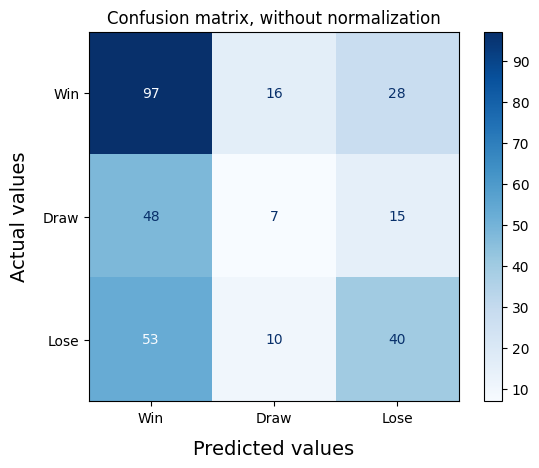

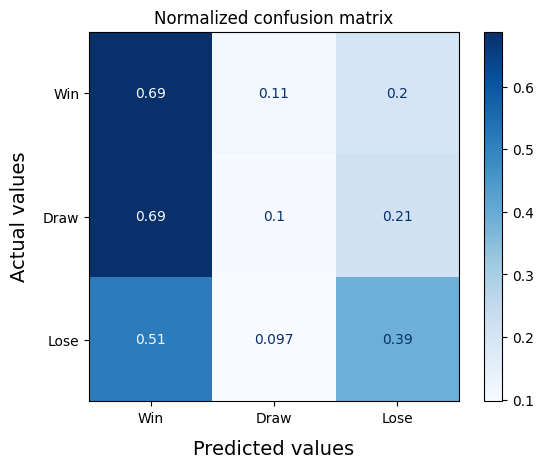

In [ ]:
model_Evaluate(classifier_knn_Count)

              precision    recall  f1-score   support

           0       0.58      0.79      0.67       141
           1       0.43      0.17      0.24        70
           2       0.62      0.56      0.59       103

    accuracy                           0.58       314
   macro avg       0.54      0.51      0.50       314
weighted avg       0.56      0.58      0.55       314



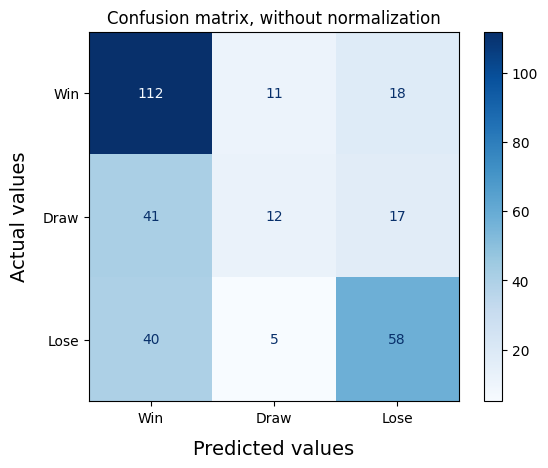

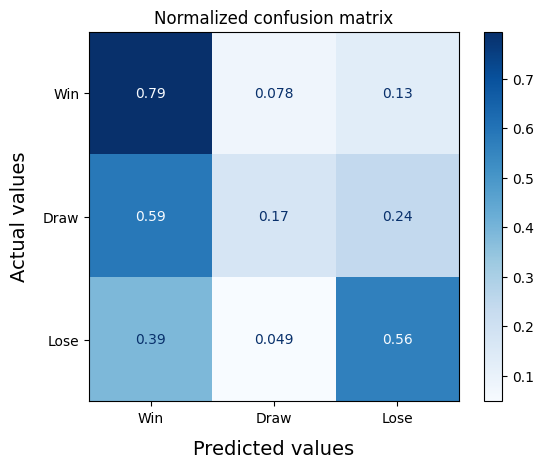

In [ ]:
model_Evaluate(classifier_svm_rbf_Count)

              precision    recall  f1-score   support

           0       0.56      0.79      0.65       141
           1       0.50      0.01      0.03        70
           2       0.52      0.56      0.54       103

    accuracy                           0.54       314
   macro avg       0.52      0.45      0.41       314
weighted avg       0.53      0.54      0.48       314



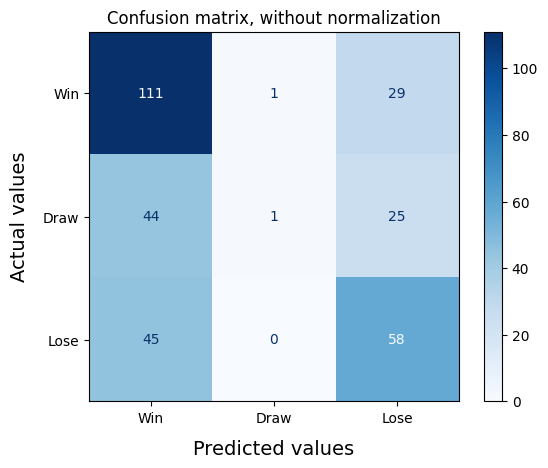

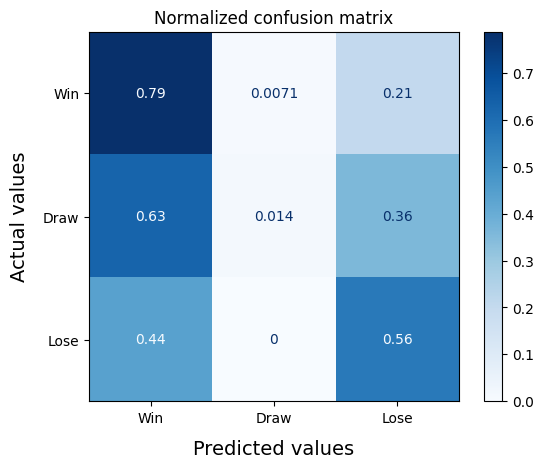

In [ ]:
model_Evaluate(classifier_svm_linear_Count)

              precision    recall  f1-score   support

           0       0.52      0.46      0.49       141
           1       0.27      0.34      0.30        70
           2       0.39      0.38      0.39       103

    accuracy                           0.41       314
   macro avg       0.39      0.39      0.39       314
weighted avg       0.42      0.41      0.41       314



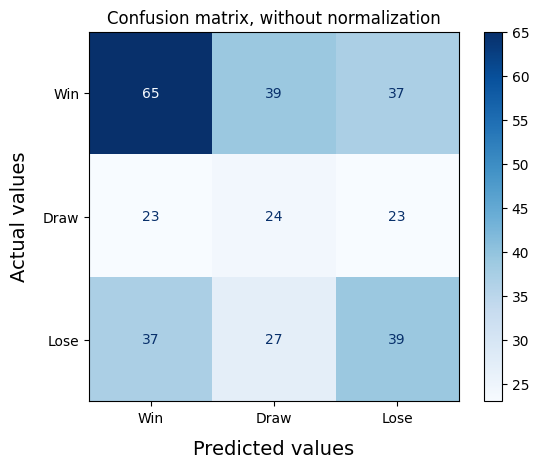

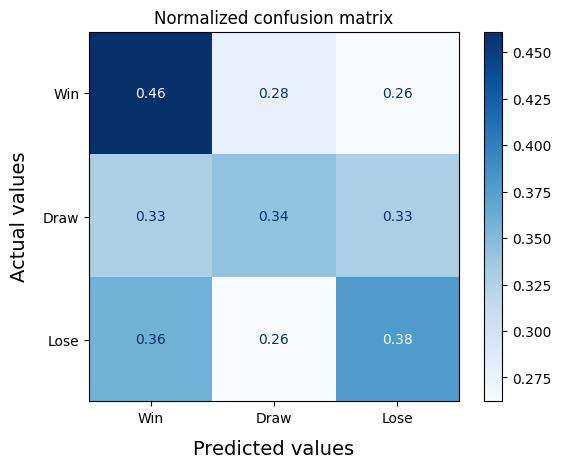

In [ ]:
model_Evaluate(classifier_dtree_Count)

In [ ]:
df.to_csv('match_data.csv', index=False)  # Save to a CSV file named 'match_data.csv'